In [1]:
import tensorflow as tf

# Load and prepare the MNIST dataset. 

mnist = tf.keras.datasets.mnist 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## 1. Perform Exploratory Data Analysis (EDA) on X_train and discuss the data and what you observe prior to beginning modeling (visualize the images) [10 pts]


In [2]:
# there is a total of 60000 black and white images in X_train

X_train.shape

(60000, 28, 28)

In [3]:
X_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

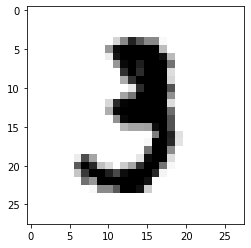

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.imshow(X_train[10, :].reshape(28, 28),
           cmap=plt.cm.binary)
plt.show()

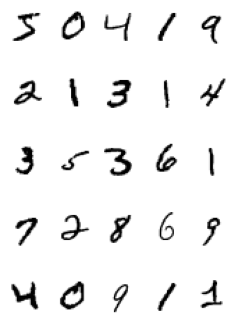

In [5]:
figure = plt.figure(figsize=(4,6))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.axis("off")
  plt.imshow(X_train[i].reshape(28, 28),
           cmap=plt.cm.binary)

## 2. Normalize the image data so the pixel values are between 0 and 1. [10 pts]

In [6]:
# Normalize data

X_train = X_train/255
X_test = X_test/255

In [7]:
X_train[0].shape

(28, 28)

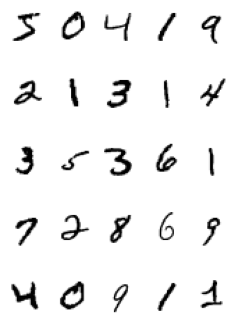

In [8]:
figure = plt.figure(figsize=(4,6))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.axis("off")
  plt.imshow(X_train[i],
           cmap=plt.cm.binary)

## 3. Use PCA to reduce the 784 dimensions of the data to 32 dimensions using X_train [10 pts]

In [9]:
# Reshape the data in X_train from 28 x 28 to 728

X_train = X_train.reshape((60000,28*28))

In [10]:
# use PCA to reduce the number of features
from sklearn.decomposition import PCA

pca = PCA(n_components=32)
X_train_reduced = pca.fit_transform(X_train)

print('X shape:', X_train.shape)
print('X_train_reduced shape:', X_train_reduced.shape)

X shape: (60000, 784)
X_train_reduced shape: (60000, 32)


In [11]:
X_train_reduced[0]

array([ 0.48601015, -1.22617357, -0.09613354, -2.17944296, -0.10704574,
       -0.91167158,  0.91763036,  0.62666561, -1.42555256,  0.77814356,
        0.77452128, -0.99631418, -0.44504005,  2.93844205,  0.85982544,
       -0.01843459,  1.2950255 ,  1.21255521,  1.08806206,  0.65033496,
        0.1069002 , -0.25228205, -0.84829883,  0.98540932,  0.17448655,
        0.38246892, -1.21567738,  0.66212138, -0.50179612, -0.52129328,
       -0.41649013,  0.07584579])

## 4. Transform X_train, discuss the original variance in X_train and how much variance  is explained by the 32 components. Plot the variance explained as a function of the number of components used and explain why the shape of the plot is what it is (use what we know about PCA)

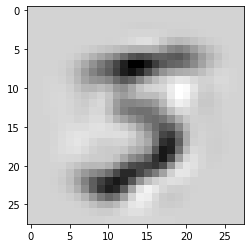

In [12]:
X_train_transformed = pca.inverse_transform(X_train_reduced)

plt.imshow(X_train_transformed[0].reshape(28, 28),
           cmap=plt.cm.binary)
plt.show()

In [13]:
X_train_transformed.shape

(60000, 784)

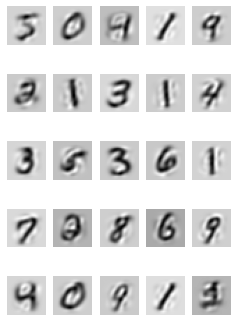

In [14]:
figure = plt.figure(figsize=(4,6))

for i in range(25):
  # this will create a 'grid' to show the images. 5 images displayed in 5 rows
  plt.subplot(5,5,i+1)
  plt.axis("off")
  plt.imshow(X_train_transformed[i].reshape(28, 28),
           cmap=plt.cm.binary)

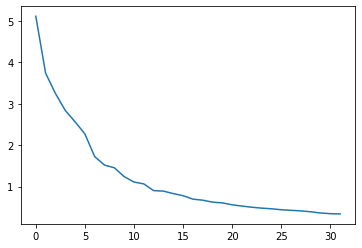

In [15]:
plt.plot(pca.explained_variance_)

In [16]:
print(np.sum(np.var(X_train,axis=0)))
print(np.sum(pca.explained_variance_[:32]))
pca.explained_variance_[:32]



52.72503549512755
39.206655806801486


array([5.11687301, 3.74139084, 3.25270845, 2.8416207 , 2.56711774,
       2.27366339, 1.72515498, 1.52056024, 1.45630525, 1.24275009,
       1.11208951, 1.06664054, 0.90468083, 0.89218122, 0.83235305,
       0.78190032, 0.69838685, 0.6732558 , 0.62599518, 0.60776271,
       0.56214558, 0.53079872, 0.50277869, 0.48114545, 0.46577494,
       0.44253139, 0.42840201, 0.41461481, 0.3926366 , 0.36412732,
       0.34683111, 0.34147848])

5. Using the transform fit on X_train, transform X_test and discuss the original variance in X_test and how much variance is explained on X_test by the 32 components. [20 pts]

In [17]:
X_test.shape

(10000, 28, 28)

In [18]:
X_test = X_test.reshape((10000,28*28))

Using the previous fit with X_train

In [19]:

pca.fit_transform(X_train)

X_test_transformed = pca.transform(X_test)


In [20]:
X_test_transformed

# I notice that the values in X_test_transformed contain negatives

array([[-1.30302419,  2.93254399, -0.1680189 , ..., -0.83233508,
        -0.31005912, -1.16012508],
       [ 0.08116456, -3.74739052, -0.59888438, ..., -0.22997883,
        -0.29642937,  0.47994271],
       [-3.70990929, -1.68958111,  0.25951505, ..., -0.79305051,
         0.32112488, -0.26502926],
       ...,
       [-1.05955982,  2.34066701,  1.39259089, ..., -0.34843484,
         0.54352652, -0.40072162],
       [-1.23147918, -0.4258963 ,  2.5209404 , ...,  0.0464607 ,
         0.60859169,  0.26117061],
       [ 4.0878012 , -0.35495963,  2.76909423, ...,  0.44665884,
        -0.15573499, -1.30265421]])

In [21]:
X_test_transformed.shape

(10000, 32)

In [22]:
X_train_transformed.shape

(60000, 784)

In [23]:
pca.n_components_

32

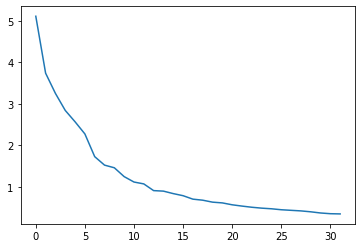

In [24]:
plt.plot(pca.explained_variance_)

6. Compare results from #4 and #5

In numpy, the np.var method allows to compute the variance along the specified axis, returning the variance of the array elements as a measure of the spread of a distrubion.

In [25]:
x_train_variance = np.sum(np.var(X_train,axis=0))

print(x_train_variance)
print(np.sum(pca.explained_variance_[:32]))
pca.explained_variance_[:32]

52.72503549512755
39.2070309621631


array([5.11687301, 3.74139084, 3.25270845, 2.8416207 , 2.56711774,
       2.27366339, 1.72515498, 1.52056024, 1.45630525, 1.24275009,
       1.11208951, 1.06664054, 0.90468083, 0.89218122, 0.83235305,
       0.78190032, 0.69838687, 0.67325579, 0.6259951 , 0.60776295,
       0.56214573, 0.5307984 , 0.50278001, 0.48114594, 0.46578093,
       0.4425355 , 0.42843358, 0.41461415, 0.39266016, 0.36423745,
       0.34681995, 0.34168829])

In [26]:
x_test_variance = np.sum(np.var(X_test,axis=0))

print(x_test_variance)
print(np.sum(pca.explained_variance_[:32]))
pca.explained_variance_[:32]

52.84824867142073
39.2070309621631


array([5.11687301, 3.74139084, 3.25270845, 2.8416207 , 2.56711774,
       2.27366339, 1.72515498, 1.52056024, 1.45630525, 1.24275009,
       1.11208951, 1.06664054, 0.90468083, 0.89218122, 0.83235305,
       0.78190032, 0.69838687, 0.67325579, 0.6259951 , 0.60776295,
       0.56214573, 0.5307984 , 0.50278001, 0.48114594, 0.46578093,
       0.4425355 , 0.42843358, 0.41461415, 0.39266016, 0.36423745,
       0.34681995, 0.34168829])

In [27]:
dif_var = x_train_variance - x_test_variance
print(dif_var)

-0.12321317629317718



Comparing the results from 4 and 5 (train vs test data), there is a difference of 0.1232 between the variance of x_train and x_test. The pca_exmplained wont change because it was fit with data from x_train.


In [28]:
from sklearn.metrics import r2_score

print(pca.explained_variance_ratio_.sum())
print(r2_score(X_train, pca.inverse_transform(pca.transform(X_train)),
               multioutput='variance_weighted'))
print(r2_score(X_test, pca.inverse_transform(pca.transform(X_test)),
               multioutput='variance_weighted'))

0.7436007798471855
0.7436026968832653
0.7503464052158882


## Part B

1. Start with data after step #2 from Section A

In [29]:
mnist = tf.keras.datasets.mnist 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train/255 
X_test = X_test/255

#X_train = X_train.reshape((60000,28*28))
#X_test = X_test.reshape((10000,28*28))


In [30]:
np.shape(X_train)

(60000, 28, 28)

2. Build an autoencoder (either at least 1 hidden layer or using CNN) that will reduce the 784 dimensions of the data to 32 dimensions [20 pts]

In [31]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_size = 784

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
hidden1 = layers.Dense(64, activation='relu')(input_img)
encoded = layers.Dense(encoding_dim, activation='relu')(hidden1)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(input_size, activation='sigmoid')(encoded)


# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


In [32]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 784)               25872     
                                                                 
Total params: 78,192
Trainable params: 78,192
Non-trainable params: 0
_________________________________________________________________


3. Train an autoencoder on X_train. Discuss the original variance in X_train and how much variance is explained by the 32 dimensions. Hint: Use “model.predict(X_train)” to get predictions [20 pts]

In [33]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 3s 8ms/step - loss: 0.0690 - val_loss: 0.0393
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0336 - val_loss: 0.0286
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0255 - val_loss: 0.0219
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0203 - val_loss: 0.0183
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0176 - val_loss: 0.0162
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0160 - val_loss: 0.0148
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0148 - val_loss: 0.0139
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0139 - val_loss: 0.0132
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0133 - val_loss: 0.0126
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0128 - val_loss: 0.0123

In [34]:
encoded_imgs_train = encoder.predict(X_train)
decoded_imgs_train = decoder.predict(encoded_imgs_train)

print("x_train",X_train)
print("encoded x_train",encoded_imgs_train)

x_train [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
encoded x_train [[ 9.236873   22.306625   14.872914   ...  5.4743857   4.003223
  18.679312  ]
 [ 7.37384    22.63243    10.109788   ... 11.858702   18.21421
   7.9641356 ]
 [ 0.27678218  9.153634    4.0677595  ... 11.40878     6.023242
   5.4805045 ]
 ...
 [ 7.8926935   3.7908216  13.865151   ...  3.2387002  11.328712
   7.1128078 ]
 [ 8.384666   27.17038    14.80851    ... 12.162581   12.362927
   0.        ]
 [ 0.         10.212504   11.457326   ...  3.7156827  15.484297
   5.127293  ]]


4. Using the model trained on X_train, transform X_test and discuss the original variance in X_test and how much variance is explained on X_test by the 32 dimensions of the autoencoder. Hint: Use “model.predict(X_test)” to get predictions. [20 pts]

In [35]:
encoded_imgs_test = encoder.predict(X_test)
decoded_imgs_test = decoder.predict(encoded_imgs_test)

print("x_test:",X_test)
print("encoded x_test:",encoded_imgs_test)

print("decoded x_test",decoded_imgs_test)

x_test: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
encoded x_test: [[ 3.676056   3.7604225 15.448254  ...  7.342149  10.286169   5.300808 ]
 [21.574469  15.365813  17.256533  ... 10.554917  24.635996  24.404177 ]
 [ 9.439267   2.345518   3.1823432 ... 17.114193   4.903667   9.620037 ]
 ...
 [11.264167  12.324134   7.202234  ... 13.99792   13.593976  13.326272 ]
 [ 7.189572  16.719187  16.449203  ... 14.112586  27.099243   6.5920124]
 [20.314537  43.627842  19.700819  ... 25.290047  16.742855  11.449626 ]]
decoded x_test [[2.18575895e-08 6.03081673e-08 1.60300373e-09 ... 2.51558667e-08
  6.89424340e-08 4.70492765e-08]
 [1.35020139e-06 1.46123185e-08 5.28168309e-09 ... 7.54285736e-08
  1.18335066e-08 1.65536633e-08]
 [4.17324941e-07 1.59948101e-07 6.11672775e-08 ... 3.05110852e-08
  4.89338959e-07 9.38843243e-07]
 ...
 [1.37058254e-10 4.05021849e-12 2.33942501e-11 ... 5.561954

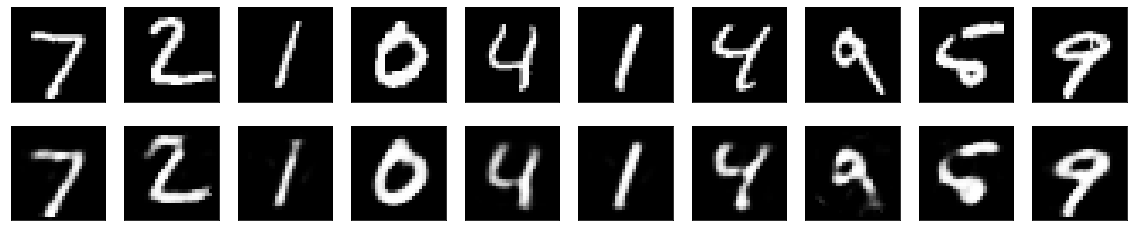

In [36]:
def plotImages(data,decoded_imgs):
  n = 10 
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # Display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(data[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # Display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(decoded_imgs[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

plotImages(X_test,decoded_imgs_test)

5. Compare results from #3 and #4 and why it is important to test out of sample [10 pts]

Comparing the original images with the decoded for x_train and x_test, in both cases the data was clearly compressed and it lost quality, however it is still clear enough to distinguish the character. This is caused by the sparcity of the encoded representations. 

Out of sample is data that has been unseen and can be used for a prediction. It is important to test models with unseen data because it can help us to validate the results. 

In [37]:

print("encoded x_train",encoded_imgs_train)

print("encoded x_test:",encoded_imgs_test)

print("encoded x_train mean: ",encoded_imgs_test.mean())
print("encoded x_test mean: ",encoded_imgs_train.mean())


encoded x_train [[ 9.236873   22.306625   14.872914   ...  5.4743857   4.003223
  18.679312  ]
 [ 7.37384    22.63243    10.109788   ... 11.858702   18.21421
   7.9641356 ]
 [ 0.27678218  9.153634    4.0677595  ... 11.40878     6.023242
   5.4805045 ]
 ...
 [ 7.8926935   3.7908216  13.865151   ...  3.2387002  11.328712
   7.1128078 ]
 [ 8.384666   27.17038    14.80851    ... 12.162581   12.362927
   0.        ]
 [ 0.         10.212504   11.457326   ...  3.7156827  15.484297
   5.127293  ]]
encoded x_test: [[ 3.676056   3.7604225 15.448254  ...  7.342149  10.286169   5.300808 ]
 [21.574469  15.365813  17.256533  ... 10.554917  24.635996  24.404177 ]
 [ 9.439267   2.345518   3.1823432 ... 17.114193   4.903667   9.620037 ]
 ...
 [11.264167  12.324134   7.202234  ... 13.99792   13.593976  13.326272 ]
 [ 7.189572  16.719187  16.449203  ... 14.112586  27.099243   6.5920124]
 [20.314537  43.627842  19.700819  ... 25.290047  16.742855  11.449626 ]]
encoded x_train mean:  12.254136
encoded x_te

In [38]:
print("x_test:",X_test)

print("decoded x_train: ",decoded_imgs_train)
print("decoded x_test: ",decoded_imgs_test)

print("decoded x_train mean: ",decoded_imgs_train.mean())
print("decoded x_test mean: ",decoded_imgs_test.mean())


x_test: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
decoded x_train:  [[7.2663955e-09 1.1983272e-09 5.7827737e-10 ... 3.5260605e-08
  4.5164228e-09 4.1279169e-10]
 [5.7703513e-08 2.3970816e-08 2.8881679e-09 ... 1.0910113e-07
  3.6840760e-08 6.5386025e-08]
 [1.4439225e-04 3.5932117e-05 4.6138586e-05 ... 7.7175901e-05
  1.2203173e-04 3.5405159e-04]
 ...
 [4.6392220e-06 4.0422860e-06 1.1624781e-05 ... 2.6019323e-05
  3.3267177e-06 2.3558127e-06]
 [4.4804833e-06 1.0406333e-07 1.5409875e-06 ... 2.9924473e-07
  2.7700963e-07 1.5052977e-06]
 [2.6754507e-05 8.6775992e-07 1.2316912e-06 ... 5.1107081e-06
  1.9066638e-06 7.9560332e-06]]
decoded x_test:  [[2.18575895e-08 6.03081673e-08 1.60300373e-09 ... 2.51558667e-08
  6.89424340e-08 4.70492765e-08]
 [1.35020139e-06 1.46123185e-08 5.28168309e-09 ... 7.54285736e-08
  1.18335066e-08 1.65536633e-08]
 [4.17324941e-07 1.59948101e-07 6.11672

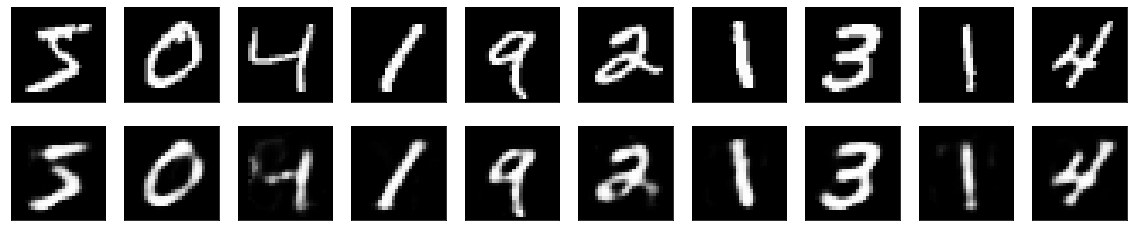

In [39]:
plotImages(X_train,decoded_imgs_train)

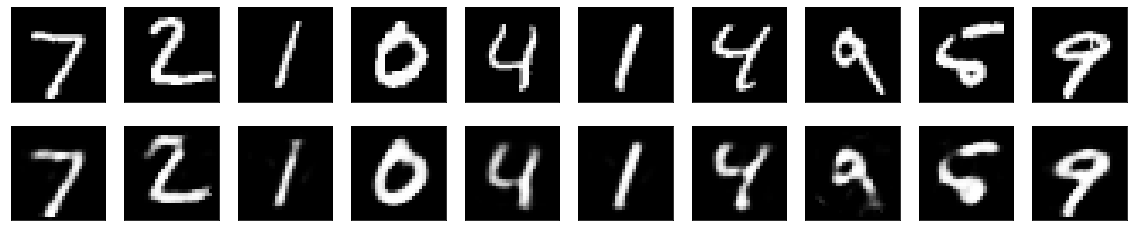

In [40]:
plotImages(X_test,decoded_imgs_test)

# **Part C: Explain Results**

## Discuss which approach explained more variance of the mnist data and why this might be the case (not just based on number of parameters). Also, discuss how many parameters each model/transform uses and which uses more parameters. Lastly, discuss when you may want to use these approaches.

Autoencoders and PCA are almost similar, the difference lies in the linearity.

PCA is an linear transformation, and Autoencoders learn the non linear structure present in data.

PCA is quicker and less expensive to compute than Autoencoders. It would be equivalent to a single layer autoencoder.



PCA had an explained variance ratio of 0.74, and the autoencoder 0.85.

In [41]:
from sklearn.metrics import r2_score

print(pca.explained_variance_ratio_.sum())

# Applying the mean square error

print(r2_score(X_train, decoded_imgs_train,
               multioutput='variance_weighted'))
print(r2_score(X_test, decoded_imgs_test,
               multioutput='variance_weighted'))

0.7436007798471855
0.8505086544301784
0.8543516446501873


Autoencoders have a large number of paramerts and this could lead to overfittng. However, PCA is used to reduce the number of features and reduce the overfitting.

In [42]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 784)               25872     
                                                                 
Total params: 78,192
Trainable params: 78,192
Non-trainable params: 0
_________________________________________________________________


# ***Part D: Extra Credit (100 pts)***

Build your own auto-encoder from scratch using numpy instead of tensorflow/keras and use it following the same process you did in Part 2. Recommendation: do not use CNN as that will be much more complicated - just use a regular feed-forward NN. You will build 

● A general Layer class which will be inherited by classes you write for 

  ○ "Dense" fully-connected layer, 𝑓(𝑋)=𝑊⋅𝑋+𝑏 
  
  ○ "ReLU" layer 

● Loss function - binary_crossentropy or mean squared error (up to you) 

● Backprop algorithm using SGD with backpropageted gradients

In [43]:
import numpy as np

class Layer:
  def __init__(self):

    self.weights = np.zeros(shape=(input.shape[1], 10))
    self.bias = np.zeros(shape=(10,))
    
  def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, 10]
        """
        output = np.matmul(input, self.weights) + self.bias
        return output


class Dense(Layer):
  def __init__(self, input_units, output_units, learning_rate=0.1):
      self.learning_rate = learning_rate
      
      # initialize weights
      self.weights = np.random.randn(input_units, output_units)*0.01
      self.biases = np.zeros(output_units)
        
  def forward(self,input):
      return np.matmul(input, self.weights) + self.biases
      
  def backward(self,input,grad_output):
      # compute d f / d x = d f / d dense * d dense / d x
      # where d dense/ d x = weights transposed
      grad_input = np.dot(grad_output,np.transpose(self.weights))

      # compute gradient w.r.t. weights and biases
      grad_weights = np.transpose(np.dot(np.transpose(grad_output),input))
      grad_biases = np.sum(grad_output, axis = 0)
      
      # Stochastic gradient descent. 
      self.weights = self.weights - self.learning_rate * grad_weights
      self.biases = self.biases - self.learning_rate * grad_biases
      return grad_input


class ReLU(Layer):
    def __init__(self):
        """ReLU layer applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        return np.maximum(0,input)

    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad 
